In [1]:
!pip install wrapt

In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [4]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 19s 49ms/step - loss: 0.2627 - accuracy: 0.9225 - val_loss: 0.0821 - val_accuracy: 0.9754
Epoch 2/10
375/375 [==============================] - 17s 46ms/step - loss: 0.0683 - accuracy: 0.9791 - val_loss: 0.0562 - val_accuracy: 0.9831
Epoch 3/10
375/375 [==============================] - 20s 52ms/step - loss: 0.0491 - accuracy: 0.9851 - val_loss: 0.0583 - val_accuracy: 0.9812
Epoch 4/10
375/375 [==============================] - 18s 47ms/step - loss: 0.0379 - accuracy: 0.9882 - val_loss: 0.0501 - val_accuracy: 0.9860
Epoch 5/10
375/375 [==============================] - 17s 46ms/step - loss: 0.0311 - accuracy: 0.9901 - val_loss: 0.0413 - val_accuracy: 0.9879
Epoch 6/10
375/375 [==============================] - 16s 43ms/step - loss: 0.0236 - accuracy: 0.9924 - val_loss: 0.0420 - val_accuracy: 0.9869
Epoch 7/10
375/375 [==============================] - 18s 47ms/step - loss: 0.0199 - accuracy: 0.9937 - val_loss: 0.0384 - val_accuracy:

In [5]:
# Evaluate the model on the test set
_, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 2s 5ms/step - loss: 0.0307 - accuracy: 0.9909
Test Accuracy: 0.9908999800682068


In [6]:
# Make predictions on the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

313/313 [==============================] - 1s 4ms/step
Accuracy: 0.9909


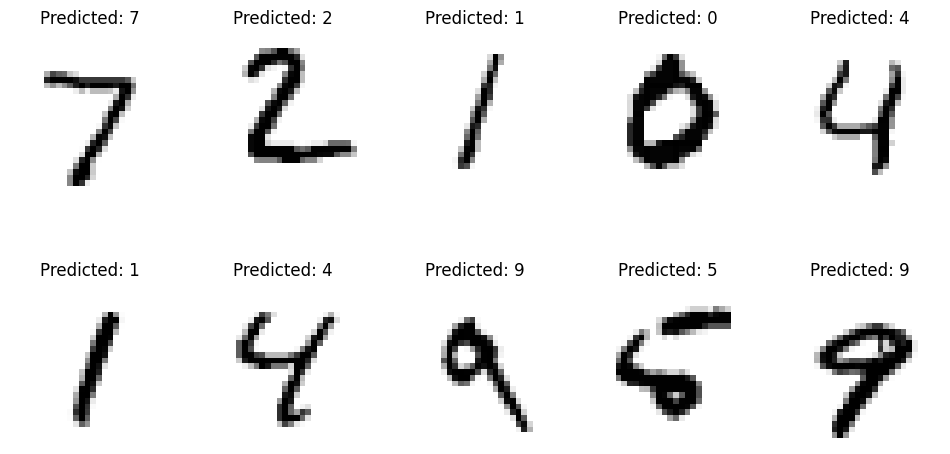

In [7]:
# Display a sample of images with their predicted labels
sample_images = X_test[:10]
sample_labels = y_pred[:10]

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, (image, label) in enumerate(zip(sample_images, sample_labels)):
    ax = axes[i // 5, i % 5]
    ax.imshow(np.squeeze(image), cmap=plt.cm.gray_r)
    ax.axis('off')
    ax.set_title(f"Predicted: {label}")
plt.show()